In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder  

In [2]:
df = pd.read_csv('tested.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [3]:
df.shape

(418, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


## DATA CLEANING

In [6]:
# finding % of null data in each column
df_null = round(100*(df.isnull().sum())/len(df), 2)
df_null

PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            20.57
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.24
Cabin          78.23
Embarked        0.00
dtype: float64

### we see 20.57% of null values in Age,0.24% null values in Fare and 78.23% of null values in Cabin

In [7]:
# we cannot drop 78.23% of data, therefore we fill values of Cabin with its mode
import random

# Get the modes of the 'Cabin' column
modes = df['Cabin'].mode()

# Replace null values with a random mode value
null_mask = df['Cabin'].isnull()
df.loc[null_mask, 'Cabin'] = random.choice(modes)

# Check how many null values remain
null_count = df['Cabin'].isna().sum()

In [8]:
null_count

0

In [9]:
# droping null values of age
df.dropna(subset=['Age'], inplace=True)
df['Age'].isnull().sum()

0

In [10]:
# droping 0.3% of null values of fare
df.dropna(subset=['Fare'], inplace=True)
df['Fare'].isnull().sum()

0

### checking if data is cleaned

In [11]:
df_null = round(100*(df.isnull().sum())/len(df), 2)
df_null

PassengerId    0.0
Survived       0.0
Pclass         0.0
Name           0.0
Sex            0.0
Age            0.0
SibSp          0.0
Parch          0.0
Ticket         0.0
Fare           0.0
Cabin          0.0
Embarked       0.0
dtype: float64

### data is now cleaned

## ANALYSIS AND VISUAIZATION

Text(0.5, 1.0, 'Sex')

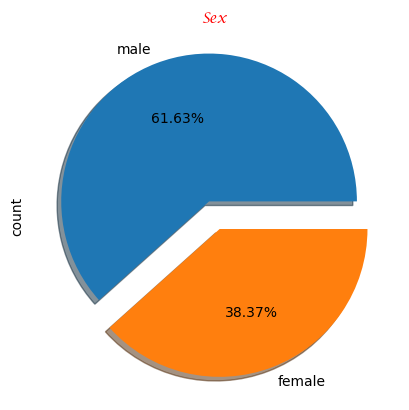

In [12]:
# total people on titanic
ax=df['Sex'].value_counts().plot.pie(explode=[0.1, 0.1],autopct='%1.2f%%',shadow=True);
ax.set_title(label = "Sex", fontsize = 20,color='Red',font='Lucida Calligraphy')

In [13]:
#total survival count 
survival_count = df['Survived'].value_counts()
survival_count

Survived
0    204
1    127
Name: count, dtype: int64

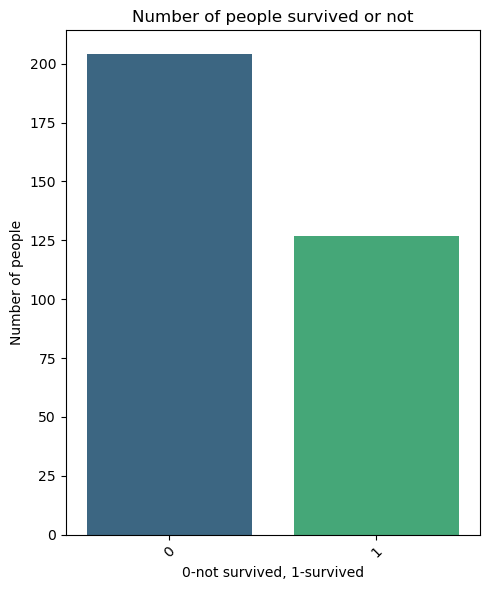

In [14]:
## Relevant Visualization Using Python
plt.figure(figsize=(5,6))
sns.barplot(x=survival_count.index, y=survival_count.values,palette="viridis")
plt.xlabel('0-not survived, 1-survived')
plt.ylabel('Number of people')
plt.title('Number of people survived or not')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [15]:
# relation bw survivors and gender :
total_survivors = df[df['Survived'] == 1].shape[0]
female_survivors = df[(df['Survived'] == 1) & (df['Sex'] == 'female')].shape[0]
male_survivors = df[(df['Survived'] == 1) & (df['Sex'] == 'male')].shape[0]

print(f'total people survived = {total_survivors}, females survived = {female_survivors}, males survived = {male_survivors}')


total people survived = 127, females survived = 127, males survived = 0


Text(0.5, 1.0, 'Survivors')

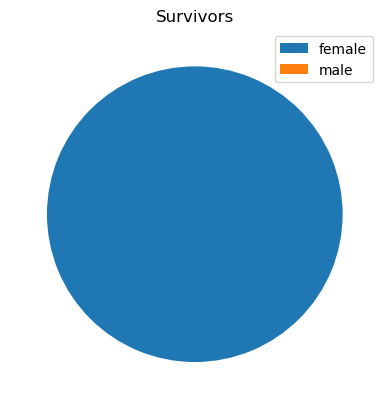

In [16]:
labels = ['female','male']
plt.pie([female_survivors,male_survivors])
plt.legend(labels, loc='upper right')
plt.title('Survivors')

In [17]:
df['Embarked'].unique()  

array(['Q', 'S', 'C'], dtype=object)

Text(0.5, 1.0, 'Passenger Count by Embarkation Port')

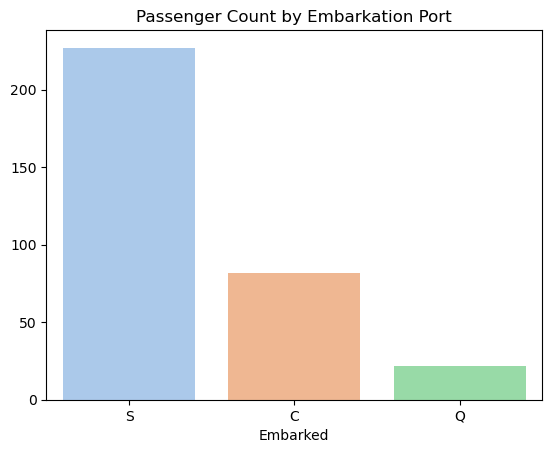

In [18]:
count = df['Embarked'].value_counts()
count
sns.barplot(x=count.index,y = count.values,palette="pastel")
plt.title("Passenger Count by Embarkation Port")

In [19]:
# corelations
subsets = df[['Survived','Age','SibSp','Fare','Parch','Pclass']]
corr_matrix = subsets.corr().round(1)
corr_matrix

,Survived,Age,SibSp,Fare,Parch,Pclass
Survived,1.0,0.0,0.1,0.2,0.2,-0.1
Age,0.0,1.0,-0.1,0.3,-0.1,-0.5
SibSp,0.1,-0.1,1.0,0.2,0.4,0.0
Fare,0.2,0.3,0.2,1.0,0.2,-0.6
Parch,0.2,-0.1,0.4,0.2,1.0,-0.0
Pclass,-0.1,-0.5,0.0,-0.6,-0.0,1.0


<Axes: >

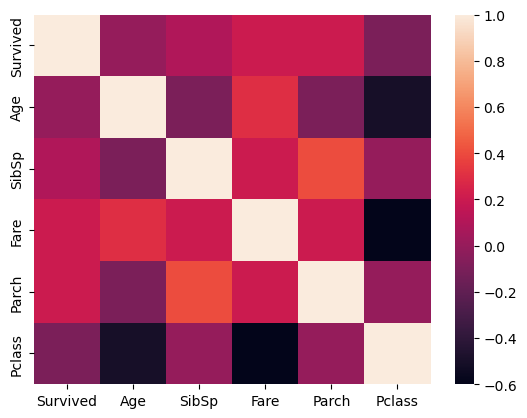

In [20]:
sns.heatmap(corr_matrix)

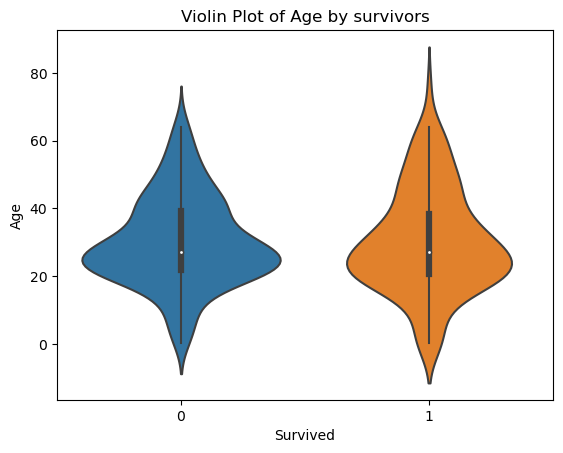

In [21]:
sns.violinplot(x='Survived', y='Age', data=df)
plt.title('Violin Plot of Age by survivors')

# Show the plot
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_1380\2906597210.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'],color='DeepPink')


<Axes: xlabel='Age', ylabel='Density'>

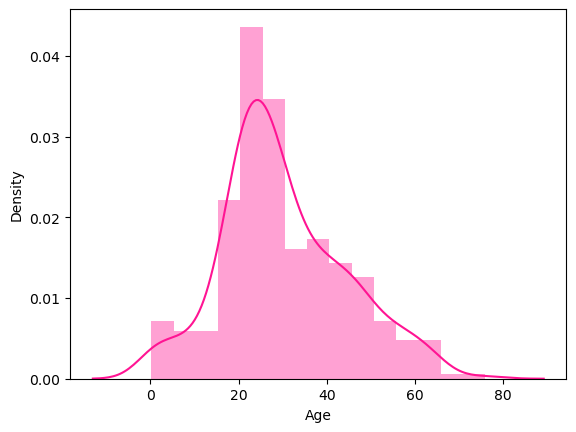

In [22]:
sns.distplot(df['Age'],color='DeepPink')

<Axes: >

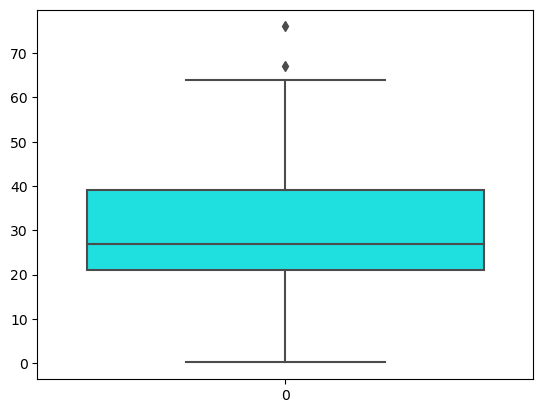

In [23]:
sns.boxplot(df['Age'],color='cyan')

Text(0.5, 1.0, 'No of people in each passenger class')

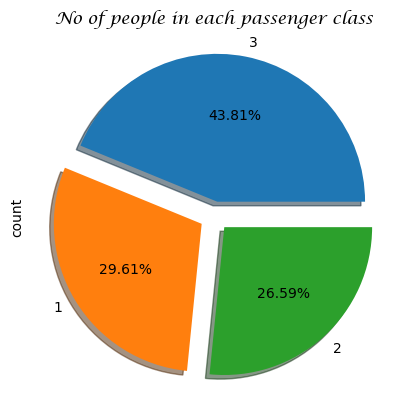

In [24]:
ax=df['Pclass'].value_counts().plot.pie(explode=[0.1, 0.1,0.1],autopct='%1.2f%%',shadow=True);
ax.set_title(label = "Pclass", fontsize = 20,color='black',font='Lucida Calligraphy')
# we see maximum people of class 3
plt.title("No of people in each passenger class")

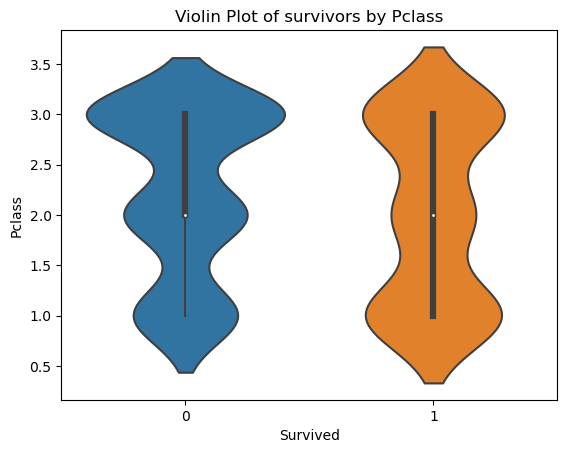

In [25]:
sns.violinplot(x='Survived', y='Pclass', data=df)
plt.title('Violin Plot of survivors by Pclass')

# Show the plot
plt.show()

## USING KNN CLASSIFICATION MODEL

### LABEL ENCODING GENDER and embarked

In [12]:
le  = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
le_dict = dict(zip(le.classes_, le.transform(le.classes_)))  ## This is how we can see the actual encoding performed by LabelEncoder
print(le_dict)

# Label encoding for embarked
le  = LabelEncoder()
df['Embarked'] = le.fit_transform(df['Embarked'])
le_dict = dict(zip(le.classes_, le.transform(le.classes_)))  ## This is how we can see the actual encoding performed by LabelEncoder
print(le_dict)

X = df.loc[:, ['Age', 'Sex','SibSp','Fare','Embarked','Pclass']]
y = df.loc[:, 'Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


{'female': 0, 'male': 1}
{'C': 0, 'Q': 1, 'S': 2}
(248, 6) (83, 6) (248,) (83,)


In [13]:
from sklearn.preprocessing import StandardScaler
st = StandardScaler()
X_train = st.fit_transform(X_train)
X_test = st.transform(X_test)

In [14]:
from sklearn.neighbors import KNeighborsClassifier
cl = KNeighborsClassifier(n_neighbors = 3,metric = 'minkowski',p=2)
cl.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [15]:
y_pred = cl.predict(X_test)
y_pred

array([1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0], dtype=int64)

In [16]:
from sklearn.metrics import confusion_matrix

In [17]:
confusion_matrix(y_test,y_pred)
from sklearn.metrics import accuracy_score

In [18]:
print("model accuracy = ", accuracy_score(y_test, y_pred)*100,"%")

model accuracy =  97.59036144578313 %


In [21]:
from PyQt5.QtWidgets import *
from PyQt5 import uic
from PyQt5.QtGui import QFont

class MyGui(QMainWindow):
    def __init__(self):
        super(MyGui, self).__init__()
        uic.loadUi("myui.ui", self)
        font = QFont("Arial", 22)
        self.label_2.setFont(font)

        # Create labels for heading tags
        self.label_gender = QLabel("Gender:", self)
        self.label_gender.move(10, 100)

        self.label_age = QLabel("Age:", self)
        self.label_age.move(10, 150)

        self.label_class = QLabel("Passenger Class:", self)
        self.label_class.move(10, 200)

        self.label_fare = QLabel("Fare Price:", self)
        self.label_fare.move(10, 250)

        self.label_embark = QLabel("Embarkation:", self)
        self.label_embark.move(10, 300)

        # Create label for "Sibling/Spouse Included" and its entry (Yes/No)
        self.label_sibling = QLabel("Sibling/Spouse Included:", self)
        self.label_sibling.move(10, 350)
        self.sibling_dropdown = QComboBox(self)
        self.sibling_dropdown.addItems(["Yes", "No"])
        self.sibling_dropdown.move(150, 350)

        # Set text color to white for new labels
        self.label_sibling.setStyleSheet("color: white;")

        # Create radio buttons for gender
        self.radio_male = QRadioButton("Male", self)
        self.radio_female = QRadioButton("Female", self)
        self.radio_male.move(100, 100)
        self.radio_female.move(200, 100)

        # Create entry box for age
        self.age_entry = QLineEdit(self)
        self.age_entry.move(150, 150)

        # Create dropdown for passenger class
        self.class_dropdown = QComboBox(self)
        self.class_dropdown.addItems(["1", "2", "3"])
        self.class_dropdown.move(150, 200)

        # Create entry box for fare price
        self.fare_entry = QLineEdit(self)
        self.fare_entry.move(150, 250)

        # Create dropdown for embarkation
        self.embark_dropdown = QComboBox(self)
        self.embark_dropdown.addItems(["C", "Q", "S"])
        self.embark_dropdown.move(150, 300)

        # Set text color to white for labels and other widgets
        self.label_gender.setStyleSheet("color: white;")
        self.label_age.setStyleSheet("color: white;")
        self.label_class.setStyleSheet("color: white;")
        self.label_fare.setStyleSheet("color: white;")
        self.label_embark.setStyleSheet("color: white;")
        self.radio_male.setStyleSheet("color: white;")
        self.radio_female.setStyleSheet("color: white;")
        self.label_2.setStyleSheet("color: white;")

        # PREDICTING
        self.pushButton = QPushButton("Predict", self)
        self.pushButton.move(150, 450)
        self.pushButton.clicked.connect(self.pred)

        self.prediction_label = QLabel(self)
        self.prediction_label.move(150, 500)
        self.prediction_label.setStyleSheet("color: white;")

        self.show()

    def pred(self):
        gender = 1 if self.radio_male.isChecked() else 0
        age = float(self.age_entry.text())
        passenger_class = int(self.class_dropdown.currentText())
        fare_price = float(self.fare_entry.text())
        embarkation = self.embark_dropdown.currentText()
        if embarkation == 'S':
            emb = 2
        elif embarkation == 'Q':
            emb = 1
        else:
            emb = 0
        sibling = 1 if self.sibling_dropdown.currentText() == "Yes" else 0

        predicted_class = self.predict_with_cl(age, gender, sibling, fare_price, emb, passenger_class)

        self.display_prediction_result(predicted_class)

    def predict_with_cl(self, age, gender, sibling, fare_price, embarkation, passenger_class):
        new_data_point = [[ age, gender, sibling, fare_price, embarkation, passenger_class]]
        predicted_class = cl.predict(new_data_point)
        if predicted_class == [1]:
            self.prediction_label.setText("Survived")
        else:
            self.prediction_label.setText("Not Survived.")


    def display_prediction_result(self, predicted_class):
        if predicted_class == 1:
            self.prediction_label.setText("Survived")
        else:
            self.prediction_label.setText("Not Survived.")

def main():
    app = QApplication([])
    window = MyGui()
    window.setGeometry(100, 100, 510, 550)
    window.setWindowTitle("Survival Prediction")
    app.exec()

if __name__ == '__main__':
    main()


In [20]:
# gui prediction confirmation 
new_data_point = [[0,19,3,7.88,1,0]]
predicted_class = cl.predict(new_data_point)
if predicted_class == [1]:
    print("Survived")
else:
    print("Not Survived.")


Not Survived.
